In [12]:
!pip install langchain
!pip install langchain_community
!pip install faiss-cpu
!pip install langchain_google_genai
!pip install langsmith
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.0 MB/s eta 0:00:00


In [34]:
from google.colab import userdata
Langchain_smith = userdata.get('LANG_CHAIN_SMITH')
llm = userdata.get('groq_api_key')

In [13]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = Langchain_smith

In [11]:
#Chatbot with langgraph
#start

#chatbot----> llm

#end

#one state to another state called state management.
#there are nodes like start chatbot and end

In [39]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 4.3 MB/s eta 0:00:00


In [40]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    groq_api_key=llm,
    model="mixtral-8x7b-32768",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [15]:
llm #done with model

ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', temperature=0.0, max_retries=2, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x79c9525497e0>, default_metadata=())

In [41]:
#start building chatbot using langgraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START,END
from langgraph.graph.message import add_messages

In [42]:
class State(TypedDict):


  messages : Annotated[list,add_messages] #messages will not be overwrite


graph_builder = StateGraph(State)

In [43]:
graph_builder

In [44]:
#cahtbot
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}


In [45]:
graph_builder.add_node("chatbot",chatbot)

In [46]:
graph_builder

In [47]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [48]:
graph=graph_builder.compile()

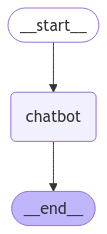

In [49]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    print("mermaid not installed")

In [50]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["q", "Q", "quit", "Quit"]:
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])  # Make sure this key exists
            print("Assistant:", value["messages"].content)  # Corrected key name here


User: how are you?
dict_values([{'messages': AIMessage(content="I'm just a computer program, so I don't have feelings or emotions. I'm here to help answer your questions to the best of my ability. Is there something specific you would like to know?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 12, 'total_tokens': 57, 'completion_time': 0.07025205, 'prompt_time': 0.002173919, 'queue_time': 0.011404081, 'total_time': 0.072425969}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-3889e16e-4220-4ce7-9b2f-8c4bec2135a2-0', usage_metadata={'input_tokens': 12, 'output_tokens': 45, 'total_tokens': 57})}])
content="I'm just a computer program, so I don't have feelings or emotions. I'm here to help answer your questions to the best of my ability. Is there something specific you would like to know?" additional_kwargs={} response_metadata={'token_usage': {'completion_